In [1]:
import pandas as pd

In [2]:
#!pip install pandas_profiling

In [3]:
import numpy as np

In [4]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Datas\\Tractor-Sales.csv")

In [5]:
#to know the path
%pwd

'c:\\Users\\HP\\Desktop\\py_codes'

In [6]:
df

,Month-Year,no_of _Tractors_Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month-Year            144 non-null    object
 1   no_of _Tractors_Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df.columns = ['Month_Year', 'No_Tractors_Sold']

In [9]:
df

,Month_Year,No_Tractors_Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


In [10]:
df['Month_Year'] = pd.to_datetime(df.Month_Year, format='%b-%y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month_Year        144 non-null    datetime64[ns]
 1   No_Tractors_Sold  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [12]:
df.set_index(df.Month_Year, inplace=True)

<Axes: xlabel='Month_Year'>

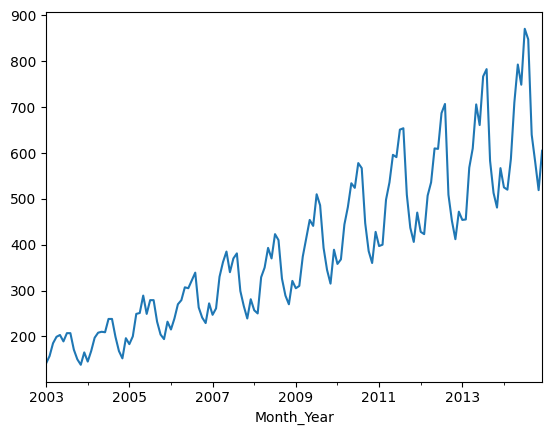

In [13]:
df.No_Tractors_Sold.plot()

In [14]:
df

,Month_Year,No_Tractors_Sold
Month_Year,,
2003-01-01,2003-01-01,141
2003-02-01,2003-02-01,157
2003-03-01,2003-03-01,185
2003-04-01,2003-04-01,199
2003-05-01,2003-05-01,203
...,...,...
2014-08-01,2014-08-01,848
2014-09-01,2014-09-01,640
2014-10-01,2014-10-01,581


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(df.No_Tractors_Sold,  model = 'multiplicable')

data = df.No_Tractors_Sold - result.seasonal - result.trend


In [16]:
data

Month_Year
2003-01-01   NaN
2003-02-01   NaN
2003-03-01   NaN
2003-04-01   NaN
2003-05-01   NaN
              ..
2014-08-01   NaN
2014-09-01   NaN
2014-10-01   NaN
2014-11-01   NaN
2014-12-01   NaN
Length: 144, dtype: float64

In [17]:
data.tail(15)

Month_Year
2013-10-01   -100.586410
2013-11-01   -140.307200
2013-12-01    -61.736443
2014-01-01   -111.656667
2014-02-01   -123.718859
2014-03-01    -61.970704
2014-04-01     55.752777
2014-05-01    134.230874
2014-06-01     87.129087
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01           NaN
2014-11-01           NaN
2014-12-01           NaN
dtype: float64

<Axes: xlabel='Month_Year'>

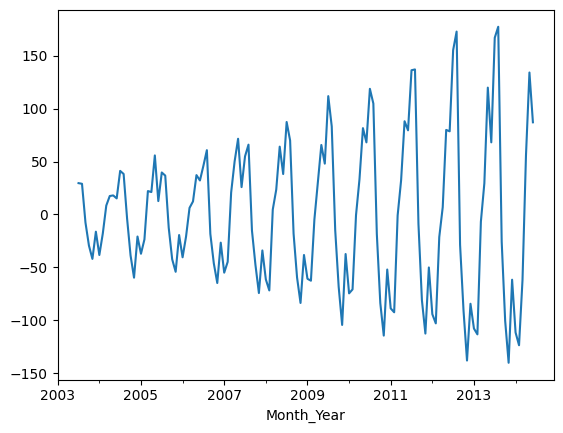

In [18]:
data.plot()

In [19]:
data = data.dropna()

<Axes: xlabel='Month_Year'>

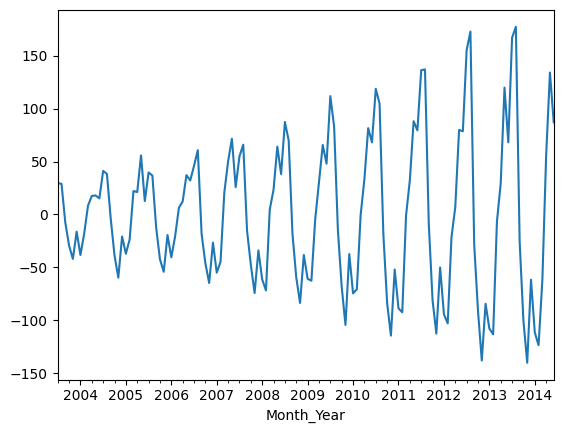

In [20]:
data.plot()

In [21]:
data.tail()

Month_Year
2014-02-01   -123.718859
2014-03-01    -61.970704
2014-04-01     55.752777
2014-05-01    134.230874
2014-06-01     87.129087
dtype: float64

In [22]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)

alpha = 0.3
model = ses.fit(smoothing_level = alpha, optimized = False)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
forcast = model.forecast(1)
forcast

2014-07-01    36.819287
Freq: MS, dtype: float64